In [2]:

from siganalogies import SIG2016_LANGUAGES, SIG2019_HIGH, enrich, generate_negative, n_pos_n_neg, enrich_no_cp, generate_negative_no_cp, n_pos_n_neg_no_cp
from utils import prepare_data, tpr_tnr_balacc_harmacc_f1, CSVCustomLogger, mask_valid

ModuleNotFoundError: No module named 'siganalogies'

In [5]:
perm0 = "abcd"

cp = {
    '+': frozenset(perm for perm in enrich(*perm0)),
    '-': frozenset(perm_n for perm in enrich(*perm0) for perm_n in generate_negative(*perm))
}
no_cp = {
    '+': frozenset(perm for perm in enrich_no_cp(*perm0)),
    '-': frozenset(perm_n for perm in enrich_no_cp(*perm0) for perm_n in generate_negative_no_cp(*perm, cp_undefined=False))
}
cp, no_cp

({'+': frozenset({('a', 'b', 'c', 'd'),
             ('a', 'c', 'b', 'd'),
             ('b', 'a', 'd', 'c'),
             ('b', 'd', 'a', 'c'),
             ('c', 'a', 'd', 'b'),
             ('c', 'd', 'a', 'b'),
             ('d', 'b', 'c', 'a'),
             ('d', 'c', 'b', 'a')}),
  '-': frozenset({('a', 'a', 'b', 'd'),
             ('a', 'a', 'c', 'd'),
             ('a', 'b', 'd', 'c'),
             ('a', 'c', 'd', 'b'),
             ('a', 'd', 'b', 'c'),
             ('a', 'd', 'c', 'b'),
             ('b', 'a', 'c', 'd'),
             ('b', 'b', 'a', 'c'),
             ('b', 'b', 'd', 'c'),
             ('b', 'c', 'a', 'd'),
             ('b', 'c', 'd', 'a'),
             ('b', 'd', 'c', 'a'),
             ('c', 'a', 'b', 'd'),
             ('c', 'b', 'a', 'd'),
             ('c', 'b', 'd', 'a'),
             ('c', 'c', 'a', 'b'),
             ('c', 'c', 'd', 'b'),
             ('c', 'd', 'b', 'a'),
             ('d', 'a', 'b', 'c'),
             ('d', 'a', 'c', 'b'),
        

In [6]:
cp['+'].intersection(no_cp['+'])

frozenset({('a', 'b', 'c', 'd'),
           ('b', 'a', 'd', 'c'),
           ('c', 'd', 'a', 'b'),
           ('d', 'c', 'b', 'a')})

In [7]:
cp['+'].intersection(no_cp['-'])

frozenset({('a', 'c', 'b', 'd'),
           ('b', 'd', 'a', 'c'),
           ('c', 'a', 'd', 'b'),
           ('d', 'b', 'c', 'a')})

In [18]:
dict_ = {"train cp, test cp":
        {"test_balacc": 0.9838166236877441,
        "test_f1": 0.9600129127502441,
        "test_harmacc_approx": 0.9837215542793274,
        "test_loss": 1.6443447059944272},
        "train cp, test no cp (cp undef)":
        {"test_balacc": 0.9852749705314636,
        "test_f1": 0.9740691184997559,
        "test_harmacc_approx": 0.9851837158203125,
        "test_loss": 0.5072329320088029},
        "train cp, test no cp (cp bad)":
        {"test_balacc": 0.86371248960495,
        "test_f1": 0.6495911478996277,
        "test_harmacc_approx": 0.8440194129943848,
        "test_loss": 30.68906628216654},

        "train no cp (cp undef), test cp":
        {"test_balacc": 0.8610000014305115,
        "test_f1": 0.7336505055427551,
        "test_harmacc_approx": 0.8575722575187683,
        "test_loss": 282.3349289454184},
        "train no cp (cp undef), test no cp (cp undef)":
        {"test_balacc": 0.9882500171661377,
        "test_f1": 0.9829524159431458,
        "test_harmacc_approx": 0.9882437586784363,
        "test_loss": 0.25272506395205857},
        "train no cp (cp undef), test no cp (cp bad)":
        {"test_balacc": 0.7660999894142151,
        "test_f1": 0.5185874700546265,
        "test_harmacc_approx": 0.7022530436515808,
        "test_loss": 297.82132533326967},

        "train no cp (cp bad), test cp":
        {"test_balacc": 0.7413040995597839,
        "test_f1": 0.6461817622184753,
        "test_harmacc_approx": 0.6594319343566895,
        "test_loss": 55.94115668771526},
        "train no cp (cp bad), test no cp (cp undef)":
        {"test_balacc": 0.9834750294685364,
        "test_f1": 0.9725180864334106,
        "test_harmacc_approx": 0.9834228754043579,
        "test_loss": 0.5366742971211672},
        "train no cp (cp bad), test no cp (cp bad)":
        {"test_balacc": 0.9856937527656555,
        "test_f1": 0.9593010544776917,
        "test_harmacc_approx": 0.9856692552566528,
        "test_loss": 0.891518109871936}}

In [19]:
dict__ = {tuple(k.split(', ')): v for k,v in dict_.items()}
dict__.keys()

dict_keys([('train cp', 'test cp'), ('train cp', 'test no cp (cp undef)'), ('train cp', 'test no cp (cp bad)'), ('train no cp (cp undef)', 'test cp'), ('train no cp (cp undef)', 'test no cp (cp undef)'), ('train no cp (cp undef)', 'test no cp (cp bad)'), ('train no cp (cp bad)', 'test cp'), ('train no cp (cp bad)', 'test no cp (cp undef)'), ('train no cp (cp bad)', 'test no cp (cp bad)')])

In [5]:
variants = ["cp", "no cp (cp undef)", "no cp (cp bad)"]
array = [[dict__["train "+train_k, "test "+test_k]["test_f1"] for test_k in variants] for train_k in variants]
labels = [[("train "+train_k, "test "+test_k) for test_k in variants] for train_k in variants]
array, labels

([[0.9600129127502441, 0.9740691184997559, 0.6495911478996277],
  [0.7336505055427551, 0.9829524159431458, 0.5185874700546265],
  [0.6461817622184753, 0.9725180864334106, 0.9593010544776917]],
 [[('train cp', 'test cp'),
   ('train cp', 'test no cp (cp undef)'),
   ('train cp', 'test no cp (cp bad)')],
  [('train no cp (cp undef)', 'test cp'),
   ('train no cp (cp undef)', 'test no cp (cp undef)'),
   ('train no cp (cp undef)', 'test no cp (cp bad)')],
  [('train no cp (cp bad)', 'test cp'),
   ('train no cp (cp bad)', 'test no cp (cp undef)'),
   ('train no cp (cp bad)', 'test no cp (cp bad)')]])

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
value = "f1"
def conf_matrix(value):
    array = [[dict__["train "+train_k, "test "+test_k][f"test_{value}"] for test_k in variants] for train_k in variants]
    labels = [[("train "+train_k, "test "+test_k) for test_k in variants] for train_k in variants]
            
    df_cm = pd.DataFrame(array, index = ["train "+k for k in variants],
                    columns = ["test "+k for k in variants])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="RdYlGn", fmt=".3f")
    plt.title(f"{value.capitalize()} confusion matrix")

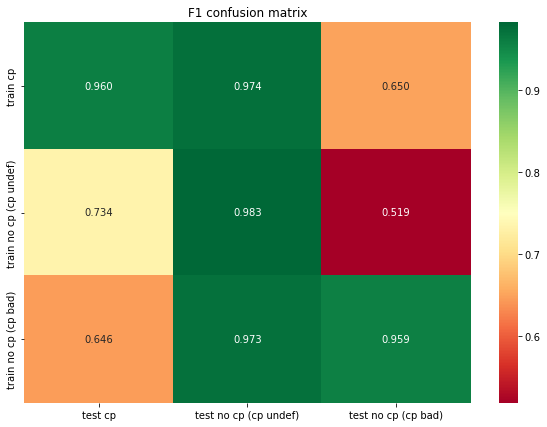

In [29]:
conf_matrix("f1")

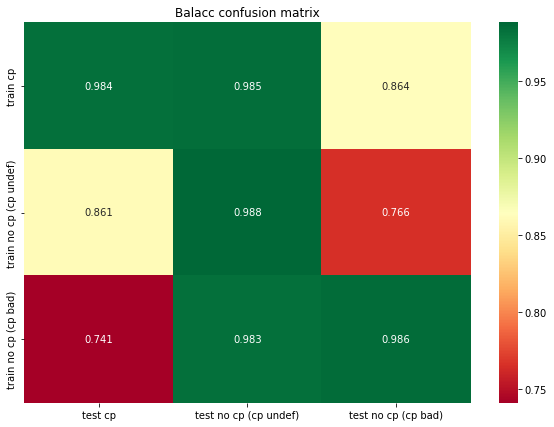

In [30]:
conf_matrix("balacc")

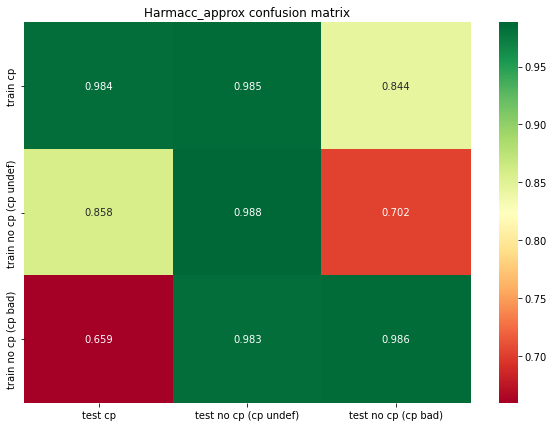

In [31]:
conf_matrix("harmacc_approx")

test setup         cp  cp undef    cp bad
train setup                              
cp           1.052383  1.029534  0.923864
cp undef     0.908375  1.042329  0.823826
cp bad       0.789507  1.036256  1.052023 [['1.052\n±0.034' '1.030\n±0.031' '0.924\n±0.027']
 ['0.908\n±0.030' '1.042\n±0.035' '0.824\n±0.027']
 ['0.790\n±0.030' '1.036\n±0.028' '1.052\n±0.028']]
test setup         cp  cp undef    cp bad
train setup                              
cp           1.034424  1.026667  0.713974
cp undef     0.771724  1.033716  0.561580
cp bad       0.692375  1.010963  0.999063 [['1.034\n±0.021' '1.027\n±0.035' '0.714\n±0.031']
 ['0.772\n±0.029' '1.034\n±0.030' '0.562\n±0.020']
 ['0.692\n±0.024' '1.011\n±0.028' '0.999\n±0.026']]
test setup         cp  cp undef    cp bad
train setup                              
cp           1.034487  1.034659  0.901817
cp undef     0.901291  1.023065  0.746059
cp bad       0.701305  1.029201  1.025465 [['1.034\n±0.030' '1.035\n±0.031' '0.902\n±0.031']
 ['0.901\n±

Text(0.5, 0.98, 'confus')

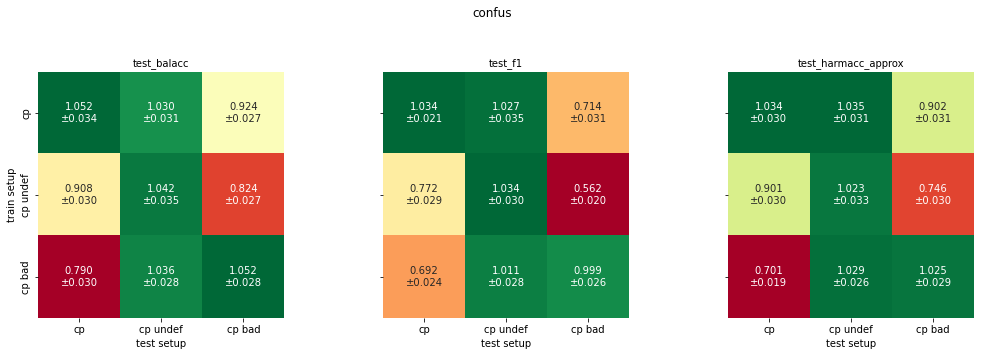

In [127]:
variants = ["cp", "no cp (cp undef)", "no cp (cp bad)"]
variants_ = ["cp", "cp undef", "cp bad"]
values = ["test_balacc", "test_f1", "test_harmacc_approx"]#, "test_loss"]
indices = pd.MultiIndex.from_product((values, variants_, variants_, range(10)), names=('measure', 'train setup', 'test setup', 'v'))
df_ = pd.DataFrame(0, index=indices, columns=('value',), dtype=float)#
#df['label'] = df['label'].astype(str)

arrays={value: [[dict__["train "+train_k, "test "+test_k][value] for test_k in variants] for train_k in variants] for value in values}

import random as r
# for value in values:
#     for i, train_values in enumerate(arrays[value]):
#         for j, test_value in enumerate(train_values):
#             for v in range(10): pass
            
#             df["value"][(value,variants_[i],variants_[j])] = test_value 
#             df["label"][(value,variants_[i],variants_[j])] = f"{test_value:.3f} \n±{r.random()*0.1:.3f}"
for v in range(10):
    for value in values:
        for i, train_values in enumerate(arrays[value]):
            for j, test_value in enumerate(train_values):
                df_["value"][(value,variants_[i],variants_[j],v)] = test_value+(r.random()*0.1)

gb = df_.groupby(['measure', 'train setup', 'test setup'])
df = gb.mean()
df["label"] = df["value"].apply(lambda x: f"{x:.3f}") + '\n±' + gb.std()["value"].apply(lambda x: f"{x:.3f}")
df

df = df.reset_index()
df["a"] = df['train setup'].apply(lambda x: variants_.index(x))
df["b"] = df['test setup'].apply(lambda x: variants_.index(x))
df.sort_values(['a', 'b'])
del df["a"]
del df["b"]

import matplotlib.pyplot as plt, seaborn as sns
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    labels: pd.DataFrame = data.pivot(index=args[1], columns=args[0], values='label')
    d = d.sort_index(key=lambda x: x.map(lambda y: variants_.index(y))).sort_index(axis=1, level='test setup',key=lambda x: x.map(lambda y: variants_.index(y)))
    labels = labels.sort_index(key=lambda x: x.map(lambda y: variants_.index(y))).sort_index(axis=1, level='test setup',key=lambda x: x.map(lambda y: variants_.index(y)))
    print(d,labels.values)
    sns.heatmap(d, annot=labels.values, fmt="s", **kwargs)

fg = sns.FacetGrid(df, col='measure', height=5)
fg.map_dataframe(draw_heatmap, 'test setup', 'train setup', 'value', cmap="RdYlGn", cbar=False, square = True)#, fmt=".3f"
fg.set_titles("{col_name}")
fg.figure.subplots_adjust(top=0.8)
fg.figure.suptitle("confus")